In [387]:
DIR_PATH = '../../Data/'
FILE_NAME = DIR_PATH +'fire_allyear.csv'


In [388]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib import font_manager as fm, rc

font_path='../../Font/malgun.ttf'
font_name=fm.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

projectDF = pd.read_csv(FILE_NAME, encoding='CP949')

In [389]:
projectDF = projectDF.iloc[:,1:]
projectDF

,년,월,시간대,시도,화재유형,발화열원대분류,발화요인대분류,최초착화물대분류,장소대분류,사망,부상,인명피해(명)소계,재산피해소계
0,2015,1,심야,경상남도,"건축,구조물",작동기기,전기적 요인,"전기,전자",주거,0,0,0,2920
1,2015,1,심야,서울특별시,임야,"담뱃불, 라이터불",부주의,기타,임야,0,0,0,0
2,2015,1,심야,서울특별시,"자동차,철도차량","담뱃불, 라이터불",부주의,"침구,직물류","자동차,철도차량",0,0,0,137
3,2015,1,심야,서울특별시,"건축,구조물","담뱃불, 라이터불",부주의,"종이,목재,건초등","판매,업무시설",0,0,0,326
4,2015,1,심야,부산광역시,"건축,구조물",작동기기,부주의,식품,주거,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
214462,2019,12,저녁,경기도,"건축,구조물",작동기기,전기적 요인,"전기,전자",산업시설,0,0,0,23707
214463,2019,12,저녁,경상북도,"건축,구조물",미상,미상,"종이,목재,건초등",산업시설,0,0,0,3542
214464,2019,12,저녁,부산광역시,"건축,구조물",작동기기,부주의,식품,"판매,업무시설",0,0,0,0
214465,2019,12,저녁,제주특별자치도,"건축,구조물",작동기기,부주의,합성수지,"판매,업무시설",0,0,0,105


In [390]:
project15DF=projectDF[projectDF['년']==2015]

In [391]:
project15DF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44435 entries, 0 to 44434
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   년          44435 non-null  int64 
 1   월          44435 non-null  int64 
 2   시간대        44435 non-null  object
 3   시도         44435 non-null  object
 4   화재유형       44435 non-null  object
 5   발화열원대분류    44435 non-null  object
 6   발화요인대분류    44435 non-null  object
 7   최초착화물대분류   44435 non-null  object
 8   장소대분류      44435 non-null  object
 9   사망         44435 non-null  int64 
 10  부상         44435 non-null  int64 
 11  인명피해(명)소계  44435 non-null  int64 
 12  재산피해소계     44435 non-null  int64 
dtypes: int64(6), object(7)
memory usage: 4.7+ MB


In [392]:
graph_1= project15DF.groupby('시도').count()['년'] # 각 지역별 화재 발생건수

Text(0.5, 1.0, '2015년 지역별 화재건수')

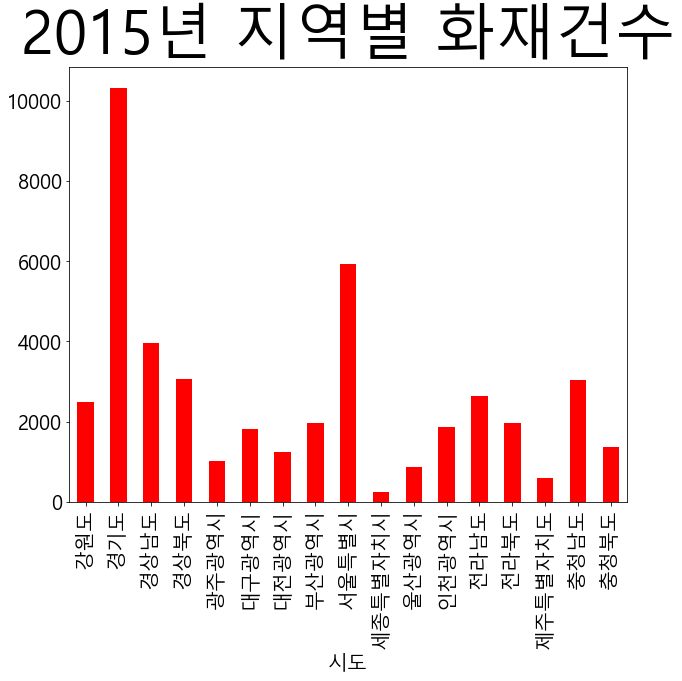

In [393]:
plt.figure(figsize=(10,8))
graph_1.plot(kind='bar', color='Red')
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)               
plt.title('2015년 지역별 화재건수')

In [394]:
gg15DF.groupby('화재유형').count()['년'] # 화재유형 1위 건축, 구조물 5677건

화재유형
건축,구조물         5677
기타(쓰레기 화재등)    2552
선박,항공기            3
위험물,가스제조소등        4
임야              843
자동차,철도차량       1254
Name: 년, dtype: int64

In [395]:
gg15DF.groupby('발화열원대분류').count()['년'] # 발화열원 1위 작동기기 3707건

발화열원대분류
기타(발화원인)       429
담뱃불, 라이터불     2305
마찰, 전도, 복사     809
미상(발화원인)      1000
불꽃, 불티        1880
자연적 발화열         92
작동기기          3707
폭발물, 폭죽          4
화학적 발화열        107
Name: 년, dtype: int64

In [396]:
gg15DF = project15DF[project15DF['시도']=='경기도']

In [397]:
gg15DF.groupby('월').count()['년'] # 월별 화재건수 3~5월 가장 많이 발생

월
1      823
2      861
3     1659
4      895
5      978
6      847
7      637
8      674
9      810
10     721
11     628
12     800
Name: 년, dtype: int64

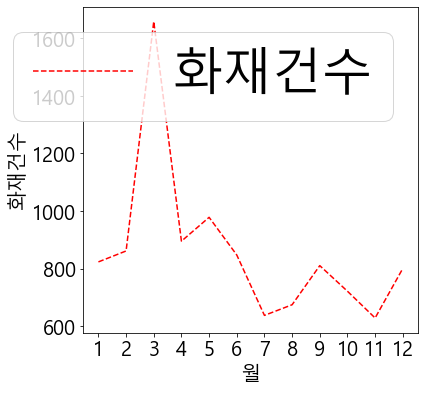

In [398]:
graph_2 = gg15DF.groupby('월').count()['년']
plt.figure(figsize=(6,6))
plt.xticks(np.arange(1,13))
plt.plot(graph_2.index,graph_2.values, 'r--')
plt.ylabel('화재건수')
plt.xlabel('월')
plt.legend(['화재건수'])
plt.show()

Text(0.5, 1.0, '2015 월별 화재건수')

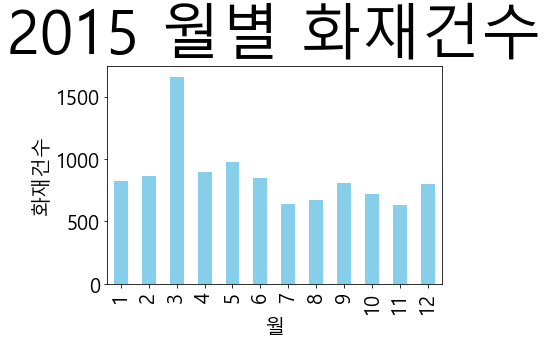

In [399]:
graph_2.plot(kind='bar', color='skyblue')
plt.ylabel('화재건수')                  
plt.title('2015 월별 화재건수')


In [400]:
gg15DF.groupby('월').count()['년'].mean() #월별 평균 화재건수 연중 가장 건조한 3~5월 평균 이상 발생 3월 최고

861.0833333333334

In [401]:
gg15DF.groupby('시간대').count()['년'] # 시간대별 화재 발생 건수 1위 낮 : 3999건수

시간대
낮     3999
심야    1446
아침    2329
저녁    2559
Name: 년, dtype: int64

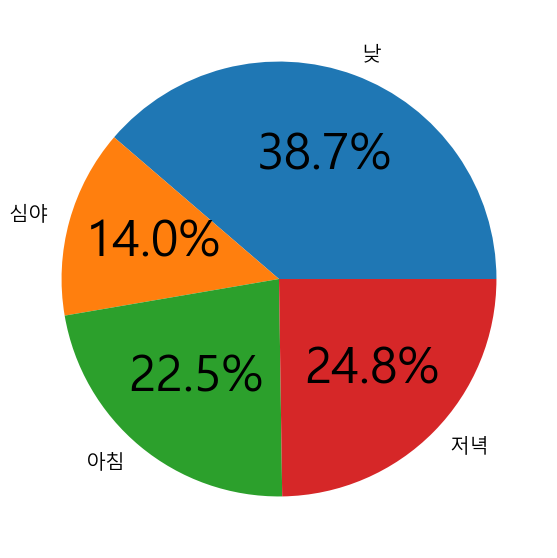

In [402]:
graph_5 = gg15DF.groupby('시간대').count()['년']

plt.figure(figsize=(10,10))
plt.rc('font', size=50)
plt.pie(graph_5, labels=graph_5.index, autopct='%.1f%%')
plt.show()

In [403]:
placeCause15 = gg15DF.groupby(['장소대분류','발화요인대분류']).count()['년']
h
placeCause15.plot(kind='bar', color='skyblue')
plt.ylabel('화재건수')                  
plt.title('2015 월별 화재건수')

NameError: name 'h' is not defined

In [ ]:
gg15DF.groupby('발화요인대분류').count()['년'] # 발화요인 1위 부주의 4957건

In [ ]:
gg15DF.groupby('장소대분류').count()['년'] # 기타 제외 산업시설에서 가장 많은 화재 발생

In [ ]:
gg15DF['재산피해소계'].max()  # 재산피해소계 1위 인덱스

In [ ]:
gg15DF.groupby('재산피해소계').count()['년']

In [ ]:
gg15DF[gg15DF['재산피해소계']==32627210] # 인덱스 값 검색결과

In [ ]:
gg15DF['인명피해(명)소계'].max() # 인명피해소계 1위

In [ ]:
gg15DF[gg15DF['인명피해(명)소계']==130]

In [ ]:
gg15DF[gg15DF['인명피해(명)소계']==18

In [ ]:
monthPart = projectDF.groupby(['월']).count()['년'] # 월별 전국 화재건수
monthPart

In [ ]:
projectDF.groupby('월').count()['년'].mean() # 전국 월별 화재건수 평균

In [ ]:
monthPart.plot(kind='bar', color='Red')  
plt.xlabel('월')
plt.ylabel('화재건수')                  
plt.title('2015년 월별 화재건수')

In [ ]:
groupsDF = gg15DF.groupby(['장소대분류','인명피해(명)소계'])

#for group in groupsDF.groups:  print(group)

In [ ]:
groupCNDT=groupsDF.count()                                 # 장소별,인명피해별 그룹화 후 멀티인덱스 => 컬럼으로
#type(groupCNDT), groupCNDT.index, groupCNDT.columns
groupCNDT.reset_index(inplace=True)
groupCNDT

In [ ]:
groupCNDT['장소별 인명피해'] = groupCNDT['인명피해(명)소계']*groupCNDT['년']
groupCNDT

In [ ]:
groupCNDT.groupby('장소대분류')['장소별 인명피해'].sum() # 시리즈 파이 그래프에 적용


In [ ]:
graph_3 = groupCNDT.groupby('장소대분류')['장소별 인명피해'].sum()
graph_3.plot(kind='bar', color='Red')
plt.xlabel('장소대분류')
plt.ylabel('화재건수')                  
plt.title('2015년 지역별 화재건수')

In [ ]:
#시간대별 화재유형 // 확인 결과 낮 심야 아침 저녁 시간대 모두 건축, 구조물 화재가 가장 많이 발생 () 
gg15DF.groupby(['시간대', '화재유형']).count()['년']

In [ ]:
groupsCNDT2 = gg15DF.groupby(['장소대분류','재산피해소계']).count()
groupsCNDT2.reset_index(inplace=True)
groupsCNDT2

In [ ]:
groupsCNDT2['장소별 재산피해'] = groupsCNDT2['재산피해소계']*groupsCNDT2['년']
groupsCNDT2

In [ ]:
graph_4 = groupsCNDT2.groupby('장소대분류')['장소별 재산피해'].sum()
graph_4.plot(kind='bar', color='Red')
plt.xlabel('장소대분류')
plt.ylabel('재산피해소계')                  
plt.title('2015년 지역별 화재건수')

In [ ]:
timePart=projectDF.groupby(['시간대']).count()['년'] # 전국 시간대별 화재건수
timePart

In [ ]:
plt.figure(figsize=(10,10))
plt.rc('font', size=30)
plt.pie(timePart, labels=timePart.index, autopct='%.1f%%')
plt.show()

In [ ]:
timePlace=projectDF.groupby(['시간대','장소대분류']).count()['년']
timePlace

In [ ]:
groupsDF_1 = projectDF.groupby(['장소대분류','인명피해(명)소계'])

In [ ]:
groupCNDT_1=groupsDF_1.count()                                 # 장소별,인명피해별 그룹화 후 멀티인덱스 => 컬럼으로
#type(groupCNDT), groupCNDT.index, groupCNDT.columns
groupCNDT_1.reset_index(inplace=True)
groupCNDT_1

In [ ]:
groupCNDT_1['장소별 인명피해'] = groupCNDT_1['인명피해(명)소계']*groupCNDT_1['년']
groupCNDT_1

In [ ]:
placePer = groupCNDT_1.groupby('장소대분류')['장소별 인명피해'].sum() # 장소별 인명피해(시리즈 파이 그래프에 적용)
placePer.plot(kind='bar', color='Red')
plt.xlabel('장소대분류')
plt.ylabel('장소별 인명피해')                  
plt.title('2015년 지역별 인명피해')

In [ ]:
projectDF.groupby(['화재유형','발화열원대분류']).count()['년']

In [ ]:
projectDF.groupby(['시도','시간대','화재유형']).count()['년']

In [ ]:
monthtimePart = projectDF.groupby(['월','시간대']).count()['년']
monthtimePart

In [ ]:
plt.figure(figsize=(20,10))
monthtimePart.plot(kind='bar', color='Red')
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)               
plt.title('2015년 지역별 화재건수')